In [1]:
import os
from pathlib import Path

import pandas as pd
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score

In [2]:
data_dir = os.path.join("..", "assets", "inference-tables", "uni")

tables = os.listdir(data_dir)

tables = [x for x in tables if "brightness" in x]

tables.sort(key=lambda x: float(Path(x).stem.split("-")[-1]))

tables = ["base.parquet"] + tables[2:]

len(tables)

25

In [3]:
tables[:5]

['base.parquet',
 'brightness-2.0408.parquet',
 'brightness-3.0612.parquet',
 'brightness-4.0816.parquet',
 'brightness-5.1020.parquet']

In [4]:
table_paths = [os.path.join(data_dir, f) for f in tables]

table_paths[:5]

['../assets/inference-tables/uni/base.parquet',
 '../assets/inference-tables/uni/brightness-2.0408.parquet',
 '../assets/inference-tables/uni/brightness-3.0612.parquet',
 '../assets/inference-tables/uni/brightness-4.0816.parquet',
 '../assets/inference-tables/uni/brightness-5.1020.parquet']

In [5]:
# test = pd.read_parquet(table_paths[0])

# test.head()

In [6]:
# plt.figure(figsize=(1,1))

# plt.imshow(test["image"][1].reshape(3, 96, 96).transpose(1,2,0))
# plt.axis("off")

# plt.show()

In [7]:
# balanced_accuracy_score(test["target"], test["prediction"])

In [8]:
# images = []
balanced_accuracies = []
aug_strengths = []

for table_path in tqdm(table_paths, desc="Extracting Metrics"):
    if "base" in table_path:
        aug_strength = "base"
    
    else:
        aug_strength = float(Path(table_path).stem.split("-")[-1])
    
    df = pd.read_parquet(table_path).drop("embedding", axis=1)
    img = df["image"][1].reshape(3, 96, 96).transpose(1,2,0)
    balanced_accuracy = balanced_accuracy_score(df["target"], df["prediction"])
    
    # images.append(img)
    balanced_accuracies.append(balanced_accuracy)
    aug_strengths.append(aug_strength)

Extracting Metrics: 100%|██████████| 25/25 [02:16<00:00,  5.45s/it]


In [21]:
results_table = {
    # "images": images,
    "balanced_accuracies": balanced_accuracies,
    "aug_strengths": aug_strengths
}

df_agg = pd.DataFrame(results_table)

df_agg.head()

,balanced_accuracies,aug_strengths
0,0.916787,base
1,0.746080,2.0408
2,0.664075,3.0612
3,0.584541,4.0816
4,0.537584,5.102


In [22]:
df_agg["aug_strengths"] = df_agg["aug_strengths"].map(lambda x: str(int(x)) if type(x) != str else x)

df_agg.head()

,balanced_accuracies,aug_strengths
0,0.916787,base
1,0.746080,2
2,0.664075,3
3,0.584541,4
4,0.537584,5


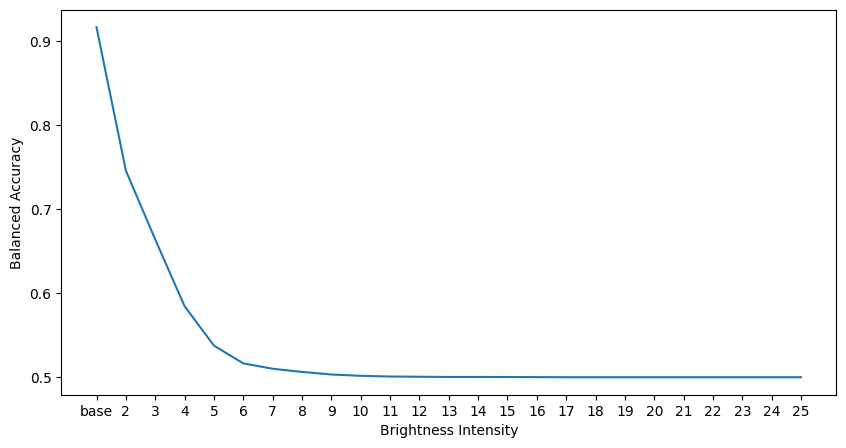

In [24]:
plt.figure(figsize=(10, 5))

sns.lineplot(df_agg, y="balanced_accuracies", x="aug_strengths")

plt.ylabel("Balanced Accuracy", fontsize=10)
plt.xlabel("Brightness Intensity", fontsize=10)

# plt.xticks(rotation=45)

plt.show()

In [12]:
images = []

for i, table_path in enumerate(tqdm(table_paths, desc="Extracting Metrics")):
    if i % 2 == 0:
        if "base" in table_path:
            aug_strength = "base"
        
        else:
            aug_strength = float(Path(table_path).stem.split("-")[-1])
        
        df = pd.read_parquet(table_path).drop("embedding", axis=1)
        img = df["image"][1].reshape(3, 96, 96).transpose(1,2,0)
        
        images.append(img)

Extracting Metrics: 100%|██████████| 25/25 [01:32<00:00,  3.69s/it]


0


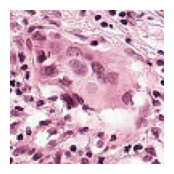

2


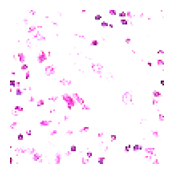

4


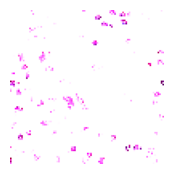

6


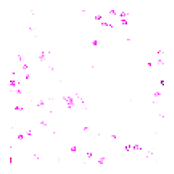

8


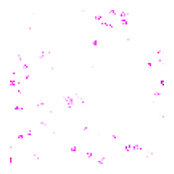

10


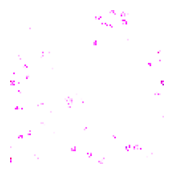

12


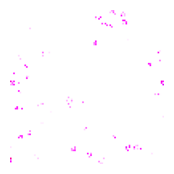

14


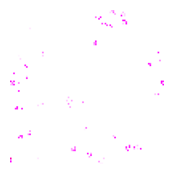

16


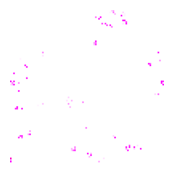

18


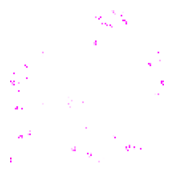

20


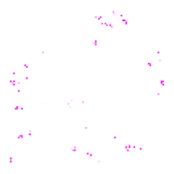

22


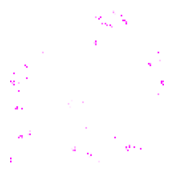

24


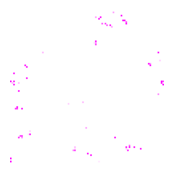

In [32]:
for i, (img) in enumerate(images):
    plt.figure(figsize=(2,2))
    plt.axis("off")
    print(i * 2)
    # plt.title(f"image: {i}")
    plt.imshow(img)
    plt.show()
